In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mohua\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# Load the dataset
data=pd.read_csv('liver_disease_.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [5]:
# select appropriate features
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [6]:
c_values=list(np.arange(1,100))

In [7]:
# cleanse the dataset
data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,NaN
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,NaN
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


In [8]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
# Select appropriate features
final_data=data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']]

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [12]:
final_data['Gender']= le.fit_transform(final_data['Gender'])
final_data['Dataset']=le.fit_transform(final_data['Dataset'])

In [13]:
final_data[final_data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [14]:
final_data['Albumin_and_Globulin_Ratio']=final_data.Albumin_and_Globulin_Ratio.fillna(final_data['Albumin_and_Globulin_Ratio'].mean())

In [15]:
# Split the data
X=final_data.drop(['Dataset'], axis=1)
y=final_data['Dataset']

In [16]:
# Split the data
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
# Implement Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

In [19]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Mohua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=logreg.predict(X_test)

In [21]:
# Calculate accuracy measures (Precision/Recall/F1/AUC of ROC/CM)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [22]:
print('Accuracy ', accuracy_score(y_test, y_pred))

Accuracy  0.6628571428571428


In [23]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[ 12  39]
 [ 20 104]]


In [24]:
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.24      0.29        51
           1       0.73      0.84      0.78       124

    accuracy                           0.66       175
   macro avg       0.55      0.54      0.53       175
weighted avg       0.62      0.66      0.64       175



In [25]:
from sklearn.metrics import roc_curve

In [26]:
y_pred_proba=logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)

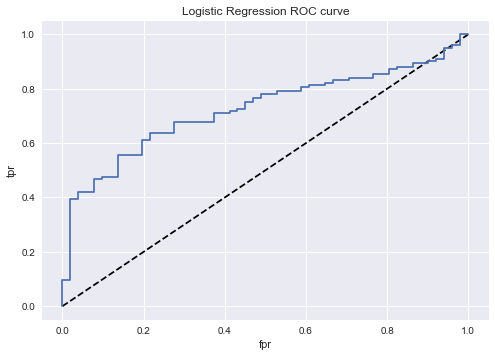

In [27]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [37]:
# Fine tune the model using different regularization parameter
log_reg=LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='newton-cg', random_state=42)

In [38]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred=log_reg.predict(X_test)

In [40]:
print('Accuracy ', accuracy_score(y_test, y_pred))

Accuracy  0.6742857142857143


In [41]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[ 14  37]
 [ 20 104]]


In [42]:
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.27      0.33        51
           1       0.74      0.84      0.78       124

    accuracy                           0.67       175
   macro avg       0.57      0.56      0.56       175
weighted avg       0.64      0.67      0.65       175

